# Sprint 10: Aprendizaje supervisado 

# Objetivos del Proyecto: 

 - Preparación de los Datos: Asegurarse de que los datos estén limpios y listos para el entrenamiento, procesando adecuadamente todos los tipos de características. Esto incluye la normalización, manejo de valores faltantes y codificación de variables categóricas.

 - Documentación del Proceso de Preprocesamiento: Proporcionar una explicación clara y detallada de los pasos de preprocesamiento realizados, para que los revisores puedan entender cómo se llegó al conjunto de datos final.

 - Análisis del Equilibrio de Clases: Investigar el equilibrio de clases en el conjunto de datos y documentar los hallazgos. Esto incluye el uso de visualizaciones y métricas para evaluar la distribución de las clases.

 - Modelo Sin Desequilibrio de Clases: Estudiar el rendimiento del modelo sin aplicar técnicas para corregir el desequilibrio de clases, para establecer una línea base de comparación.

 - Descubrimientos en la Investigación: Identificar y documentar lo que se aprendió durante la investigación del ejercicio, incluyendo cualquier hallazgo inesperado o relevante.

 - División de los Datos: Asegurarse de que los datos se dividan correctamente en conjuntos de entrenamiento, validación y prueba, siguiendo las mejores prácticas.

 - Manejo del Desequilibrio de Clases: Implementar y documentar las técnicas utilizadas para abordar el desequilibrio de clases, asegurando que se considere este aspecto en todo momento.

 - Uso de Técnicas de Corrección: Aplicar al menos dos técnicas diferentes para corregir el desequilibrio de clases, como submuestreo, sobremuestreo o generación de datos sintéticos.

 - Entrenamiento, Validación y Pruebas: Realizar un entrenamiento, validación y pruebas finales del modelo de manera rigurosa, asegurando que cada paso se documente adecuadamente.

 - Evaluación de Métricas: Evaluar y reportar el valor F1 del modelo, así como los valores AUC-ROC, para medir su rendimiento en el contexto del desequilibrio de clases.

 - Estructura y Limpieza del Código: Mantener una estructura clara y un código limpio, que sea fácil de seguir y entender, facilitando la revisión por parte de otros.


In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,roc_auc_score ,roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## Pre-procesamiento de datos 

In [5]:
print('Valores ausentes en la columna "Tenure" ', data['Tenure'].isna().sum())

Valores ausentes en la columna "Tenure"  909


In [6]:
print(data['Tenure'].sample(5,random_state=1245))

68      5.0
9428    9.0
7304    8.0
9111    5.0
5514    NaN
Name: Tenure, dtype: float64


Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)

In [7]:
print(data[data['Tenure'].isna()].head())

    RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
30         31    15589475    Azikiwe          591     Spain  Female   39   
48         49    15766205        Yin          550   Germany    Male   38   
51         52    15768193  Trevisani          585   Germany    Male   36   
53         54    15702298   Parkhill          655   Germany    Male   41   
60         61    15651280     Hunter          742   Germany    Male   35   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
30     NaN       0.00              3          1               0   
48     NaN  103391.38              1          0               1   
51     NaN  146050.97              2          0               0   
53     NaN  125561.97              1          0               0   
60     NaN  136857.00              1          0               0   

    EstimatedSalary  Exited  
30        140469.38       1  
48         90878.13       0  
51         86424.57       0  
53        164040.94 

In [8]:
print('Porcentaje de valores ausente del total de datos: ', (data['Tenure'].isna().sum()/data['Tenure'].count())*100)
print('Media de Tenure', data['Tenure'].mean())
print('Mediana de Tenure', data['Tenure'].median())

Porcentaje de valores ausente del total de datos:  9.99890001099989
Media de Tenure 4.997690023099769
Mediana de Tenure 5.0


Son casi el 10% de nuestros datos, un porcentaje bastante significativo por lo que si eliminamos estos datos puede llevar a perder informacion valiosa para nuestro modelo ademas de que es una columna relevante. Por lo que adoptaremos el siguiente enfoque: 

Como la media y la mediana son casi iguales,existe una simetría en la distribución,esto sugiere que los datos de Tenure están distribuidos de manera bastante simétrica.Hay un equilibrio entre valores altos y bajos respecto al centro, por lo que hay ausencia de sesgos fuertes. Dado que el riesgo de introducir sesgos es menor llenaremos estos valores faltantes con la mediana

In [9]:
# llenamos con la mediana 
data['Tenure'].fillna(data['Tenure'].median(),inplace = True)

In [10]:
# definimos una funcion para la codificacion de etiquetas 
def codificacion_de_etiquetas(data):  
    # Seleccionamos solo las columnas categoricas
    columns_categorical = data.select_dtypes(include=['object']).columns
    encoder = OrdinalEncoder()
    encoder.fit(data[columns_categorical])
    data[columns_categorical] = encoder.transform(data[columns_categorical])
    return data 
data_preprocessed = codificacion_de_etiquetas(data)

In [11]:
print(data_preprocessed.head())

   RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602   1115.0          619        0.0     0.0   42   
1          2    15647311   1177.0          608        2.0     0.0   41   
2          3    15619304   2040.0          502        0.0     0.0   42   
3          4    15701354    289.0          699        0.0     0.0   39   
4          5    15737888   1822.0          850        2.0     0.0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## Entrenamiento del modelo 

Para esta seccion entrenaremos dos modelos sin tener en cuenta el desequilibrio de clases. 

In [12]:
# Separamos en las caracteristica del objetivo 
features = data_preprocessed.drop(['Exited','RowNumber', 'CustomerId'],axis = 1)
target = data_preprocessed['Exited']

In [13]:
# Partimos nuestros datos en cojuntos de entrenamiento y validacion 
features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size = 0.2,random_state = 12345)

### Utilizando Regresion logistica

In [14]:
# definimos el modelo 
model = LogisticRegression(random_state = 12345,solver = 'liblinear')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)

In [15]:
# Calculamos algunas metricas 
print('Exactitud: ',accuracy_score(target_valid,predictions))
print('F1 score: ', f1_score(target_valid,predictions))

Exactitud:  0.7815
F1 score:  0.09523809523809523


### Utilizando un bosque aleatorio de clasificacion 

In [16]:
# Definimos el modelo y realizamos la prediccion 
model = RandomForestClassifier(n_estimators =100,max_depth = 11,random_state = 12345)
model.fit(features_train,target_train)
predictions = model.predict(features_valid)

In [17]:
# Calculamos algunas metricas 
print('Exactitud: ',accuracy_score(target_valid,predictions))
print('F1 score: ', f1_score(target_valid,predictions))


Exactitud:  0.8525
F1 score:  0.5440494590417311


In [18]:
# Realizaremos una prueba de cordura 
model = DummyClassifier(strategy = 'constant', constant = 0)  #Predecimos una clase contante (en este caso la mas frecuente)
model.fit(features_train,target_train)
predict = model.predict(features_valid)
# Calculamos algunas metricas 
print('Exactitud: ',accuracy_score(target_valid,predict))
print('F1 score: ', f1_score(target_valid,predict))

Exactitud:  0.7865
F1 score:  0.0


Observaciones: 
- En la regresion logistica notamos una exactitud del 78,65% y un f1_score de 0. Esto se responde facilmente sabemos que el umbral por defecto en la regresion logistica es de 0,5 como la probabilidad de cada observacion para la clase positiva (1) es pequeña jamas pasa este umbral y por tanto jamás sera clasificado como positiva. Esto evidencia un desbalance de clase. 

- La prueba de cordura arroja un valor de exactitud bastante elevado 78,65% preciendo solo una clase , por otro lado nuestro modelo de bosque aleatorio de clasificacion nos ofrece una exactitud del 84% y un f1_score del 51,19% que aún esta por debajo del objetivo de este proyecto. 

- Podemos mencionar que tanto para la regresion logistica como para la prueba de cordura que se hizo tienen la misma precision dado que ambos modelos estan prediciendo una sola clase (0), por este mismo motivo es que tienen tambien el mismo valor de f1_score (promedio armonico de recall y precision) es 0. 

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Genial! Dejaste comentarios claros sobre las decisiones que tomaste. Documentar cada paso es esencial, no solo para ti, sino también para que otros entiendan las razones detrás de las transformaciones de los datos.

</div>

Es claro la existencia de un desbalance de clases, veamos: 

In [19]:
frecuency = target_train.value_counts(normalize = True) 

<AxesSubplot:>

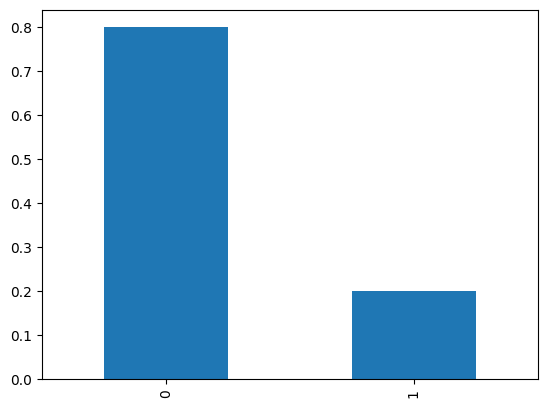

In [20]:
frecuency.plot(kind ='bar')

Como se observa hay un fuerte desequilibrio de clases, siendo la clase mas frecuente (0) con un 80% y un 20% para la clase rara. En las siguientes secciones ofreceremos varias soluciones. 

## Ajuste de peso de clase 

### Usando regresion logistica 

####  Utilizando solo regresion logistica y ajustando el umbral 

Hasta este punto, tenemos claro que la clase mayoritaria está haciendo que nuestra métrica F1-score 0 ya que solo predecimos una sola clase.Sabemos que, para cada observación, la regresión logística calcula la probabilidad de cada clase y considerando solo la probabilidad de la clase positiva, determina a qué clase pertenecerá la observación según el umbral establecido. Por lo tanto, cambiaremos este umbral, que por defecto es 0.5.

In [21]:
# Entrenamos el modelo de regresion logistica
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_train,target_train)

LogisticRegression(random_state=12345, solver='liblinear')

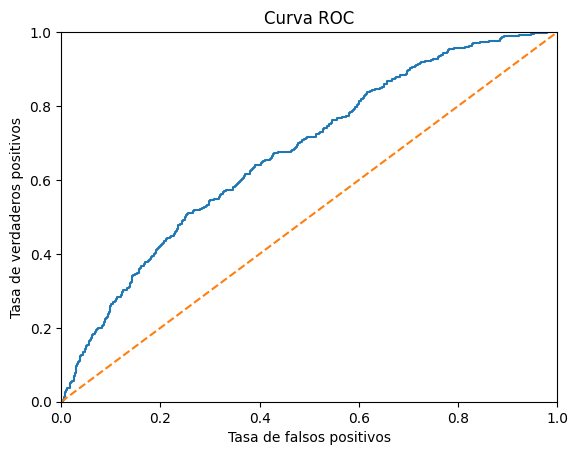

In [22]:
# Veamos que tan bueno es el modelo 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
# trazamos la grafica
plt.plot(fpr, tpr)
# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [23]:
print('El valor de AUC-ROC del modelo es: ', roc_auc_score(target_valid,probabilities_one_valid))

El valor de AUC-ROC del modelo es:  0.6737003681862103


In [24]:
best_f1_score = 0 
best_umbral = 0 
for umbral in np.arange(0,1,0.002): 
    # si esta probabilidad (determinada por el modelo) es mayor a nuestro umbral pertenece a la clase 1 
    predictions = probabilities_one_valid > umbral 
    score_f1 = f1_score(target_valid,predictions) 
    if score_f1 > best_f1_score: 
        best_f1_score = score_f1
        best_umbral = umbral 
        
print(f'El mejor f1_score del modelo es {best_f1_score} modificando el umbral a {best_umbral}')

El mejor f1_score del modelo es 0.4161073825503356 modificando el umbral a 0.244


Vemos que cambiando el umbral a 0,154 podemos mejorar la metrica f1_score (mejor precision y recall) pero aún así sigue siendo insuficiente para el objetivo de este proyecto que es superar el valor de 0,59 para el f1_score. Intentaremos mejorarlo en las siguientes secciones. 

#### Class_weight = 'balanced' 

Entrenaremos un modelo de regresion logistica, utilizando uno de sus parametros 'class_weight', definiendola como balanceada. 

In [25]:
# Entrenamos el modelo de regresion logistica
model = LogisticRegression(random_state = 12345, solver = 'liblinear', class_weight='balanced')
model.fit(features_train,target_train)
predictions = model.predict(features_valid)

In [26]:
# Calculamos algunas metricas 
print('Exactitud: ',accuracy_score(target_valid,predictions))
print('F1 score: ', f1_score(target_valid,predictions))

Exactitud:  0.6765
F1 score:  0.47948511665325827


Esto es un avance, el F1-score ha mejora para el caso de la regresion logistica pero aun sigue siendo insuficiente para el objetivo de este proyecto. Veremos si ajustando el umbral podemos mejorar esta metrica. 

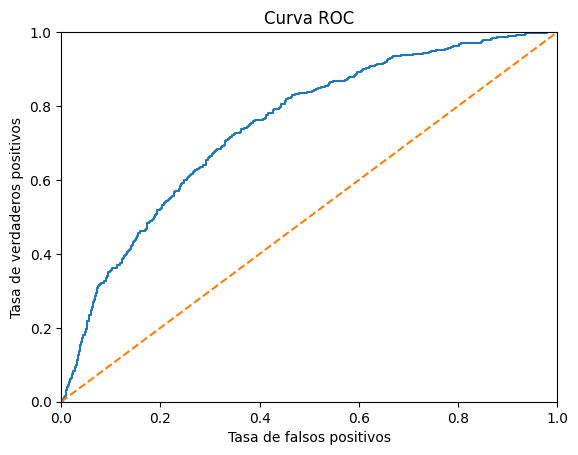

In [27]:
# Veamos que tan bueno es el modelo 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
# trazamos la grafica
plt.plot(fpr, tpr)
# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [28]:
print('El valor de AUC-ROC del modelo es: ', roc_auc_score(target_valid,probabilities_one_valid))

El valor de AUC-ROC del modelo es:  0.7448706286262173


Este modelo presenta una buena curvatura hacia la parte superior izquierda lo que indicar ser un buen modelo.Iremos cambiando el umbral: 

In [29]:
best_f1_score = 0 
best_umbral = 0 
for umbral in np.arange(0,1,0.002): 
    # si esta probabilidad (determinada por el modelo) es mayor a nuestro umbral pertenece a la clase 1 
    predictions = probabilities_one_valid > umbral 
    score_f1 = f1_score(target_valid,predictions) 
    if score_f1 > best_f1_score: 
        best_f1_score = score_f1
        best_umbral = umbral 
        
print(f'El mejor f1_score del modelo es {best_f1_score} modificando el umbral a {best_umbral}')

El mejor f1_score del modelo es 0.48238057948316365 modificando el umbral a 0.488


Hemos tenido una mejora en f1_score y esto se debe a la especificacion del parametro 'class_weight' que otorga más peso para la clase 'rara', tratamos de ajustar el umbral para mejorar esta metrica y si bien es cierto este aumento sigue siendo insuficiente el objetivo del proyecto. 

#### Sobremuestreo 

Para esta seccion duplicaremos las observaciones de la clase menos frecuente para solucionar el desequilibrio de clases y asi tengamos un mejor modelo para el caso de regresion logistica. 

In [30]:
print(features_train.shape)
print(target_train.shape)

(8000, 11)
(8000,)


In [31]:
# funcion de sobremuestreo, repite la clase rara. 
def sobre_muestreo(features,target,repeat):
    # Dividimos la muestra de entrenamiento por clase 
    class_zero_features = features[target == 0]
    class_one_features = features[target == 1] 
    class_zero_target = target[target == 0]
    class_one_target = target[target == 1]

    features_upsampled = pd.concat([class_zero_features] + [class_one_features] * repeat)  
    target_upsampled = pd.concat([class_zero_target] + [class_one_target] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Quizás el sobremuestreo debería ser mas agresivo. Eso lo sabrás si analizas cuán pronuenciada es la diferencia entre clases.

</div>

In [32]:
# probaremos duplicando la clase menos frecuente sobre el conjunto de entrenamiento 
features_upsampled, target_upsampled = sobre_muestreo(features_train, target_train, 2)

In [33]:
# Aumento de del tamaño de nuestros datos 
print(features_upsampled.shape)
print(target_upsampled.shape)

(9610, 11)
(9610,)


In [34]:
# entrenamiento del modelo 
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_upsampled,target_upsampled)
# predecimos con el conjunto de validacion 
predictions = model.predict(features_valid)

In [35]:
# Calculamos algunas metricas 
print('Exactitud: ',accuracy_score(target_valid,predictions))
print('F1 score: ', f1_score(target_valid,predictions))

Exactitud:  0.766
F1 score:  0.3371104815864022


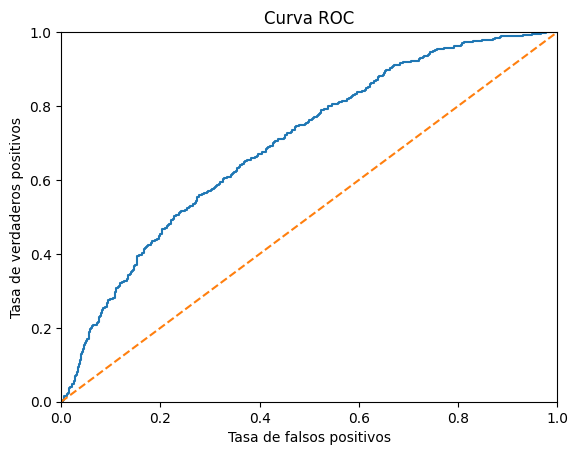

In [36]:
# Veamos que tan bueno es el modelo 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
# trazamos la grafica
plt.plot(fpr, tpr)
# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [37]:
print('El valor de AUC-ROC del modelo es: ', roc_auc_score(target_valid,probabilities_one_valid))

El valor de AUC-ROC del modelo es:  0.6976391715586946


Podemos ver que con el sobremuestreo, el F1-score aumenta respecto a nuestro modelo inicial de regresion logistica que teniamos y que su F1-score era cero, pero este sigue siendo insuficiente para el objetivo de nuetro proyecto que es un F1 score mayor al 59%. tambien es importante notar que la exactitud del modelo es baja. 

#### Submuestreo

Ahora lo que haremos sera eliminar una parte de nuestra clase mas frecuente para poder tener un mejor modelo.Es importante mencionar que anteriormente se menciono que el 80% del cojunto de entrenamiento es de la clase 0 mientras que el 20% para la clase 1. Es decir la relacion es de 1 a 4 si deseamos equiparar ambas clases tenemos que escoger solo el 25% de la clase mas frecuente.  

In [38]:
def submuestreo(features, target, fraction):
    # Dividimos en clases la muestra de entrenamiento 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Concatenamos 
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    #Combinamos 
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

In [39]:
# vamos equiparar las dos clases ya que la clase menos frecuente representa el 20% sobre el conjunto de entrenamiento
features_dowsampled ,target_dowsampled = submuestreo(features_train,target_train, 0.25)

In [40]:
# entrenamiento del modelo 
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_dowsampled,target_dowsampled)
predictions = model.predict(features_valid)

In [41]:
# Calculamos algunas metricas 
print('Exactitud: ',accuracy_score(target_valid,predictions))
print('F1 score: ', f1_score(target_valid,predictions))

Exactitud:  0.6465
F1 score:  0.449805447470817


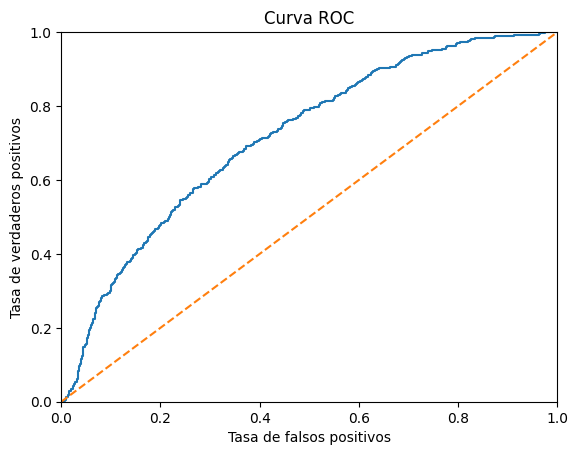

In [42]:
# Veamos que tan bueno es el modelo 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
# trazamos la grafica
plt.plot(fpr, tpr)
# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [43]:
print('El valor de AUC-ROC del modelo es: ', roc_auc_score(target_valid,probabilities_one_valid))

El valor de AUC-ROC del modelo es:  0.715875778468923


In [44]:
# veremos el mejor umbral 
best_f1_score = 0 
best_umbral = 0 
for umbral in np.arange(0,1,0.002): 
    # si esta probabilidad (determinada por el modelo) es mayor a nuestro umbral pertenece a la clase 1 
    predictions = probabilities_one_valid > umbral 
    score_f1 = f1_score(target_valid,predictions) 
    if score_f1 > best_f1_score: 
        best_f1_score = score_f1
        best_umbral = umbral 
        
print(f'El mejor f1_score del modelo es {best_f1_score} modificando el umbral a {best_umbral}')

El mejor f1_score del modelo es 0.4518695306284805 modificando el umbral a 0.506


A manera de conclusión de esta sección, revisaremos los cuatro enfoques que implementamos para tratar el desbalance de clase en un modelo de regresión logística:

 - Modificación del Umbral: En el primer enfoque, probamos modificando el umbral de decisión. Al hacerlo, logramos un F1-score de 0.38. Este fue el primer modelo desarrollado en el proyecto sin considerar el desbalance de clases; al tener un umbral por defecto de 0.5, el modelo predijo únicamente la clase 0, resultando en un F1-score de 0. Al reducir el umbral, mejoramos ligeramente el F1-score, pero no fue suficiente para alcanzar el nivel de desempeño deseado, quedando en un máximo de 0.59.

 - Uso del Parámetro class_weight: En el segundo enfoque, empleamos el parámetro class_weight='balanced' de la regresión logística, que ajusta automáticamente el peso de las clases para otorgar más importancia a la clase menos frecuente. Esto resultó en un modelo con un AUC-ROC de 0.75, lo que indica una capacidad razonable para distinguir entre clases. Sin embargo, al optimizar el umbral, el F1-score máximo alcanzado fue de 0.51, aún insuficiente para el objetivo del proyecto. Este resultado, aunque mejor que el anterior, refleja las limitaciones de la regresión logística en datos desbalanceados, ya que esta técnica es sensible a los desequilibrios entre clases.

 - Sobremuestreo: Para el tercer enfoque, aplicamos sobremuestreo de la clase minoritaria. Sin embargo, los resultados del modelo no fueron satisfactorios. El sobremuestreo a menudo puede llevar a sobreajuste, especialmente en modelos simples como la regresión logística, y esto podría explicar la baja precisión obtenida en este caso.

 - Submuestreo: Por último, probamos con submuestreo de la clase mayoritaria. Este método mostró una mejora notable en el desempeño, con resultados similares al enfoque de class_weight. A pesar de esta mejoría, el F1-score alcanzado sigue siendo insuficiente para cumplir con los objetivos del proyecto. El submuestreo reduce el tamaño de la clase mayoritaria y, en consecuencia, puede mejorar la precisión en problemas de clasificación desbalanceada, aunque limita la cantidad de datos que el modelo tiene para aprender.
 
Dado que el AUC-ROC máximo obtenido fue de 0.75, consideramos que estos métodos de ajuste para la regresión logística presentan limitaciones cuando se trata de desbalance de clase severo. Por ello, en la siguiente sección exploraremos un modelo de bosque aleatorio, que, al manejar mejor las relaciones no lineales y adaptarse bien a conjuntos de datos desbalanceados, podría ofrecer un desempeño superior en esta tarea.

### Usando un Bosque aleatorio de clasificacion 

Antes de pasar a esta seccion decidí separar todos nuestros datos en 3 partes: 80% para entrenamiento , 10% para validacion y 10% para test. Esto para realizar un test final en nuestro modelo. 

In [45]:
# Separamos en dos cojuntos (entrenamiento: 80%)
features_train, features_temp, target_train, target_temp = train_test_split(features,target, test_size=0.2, random_state=54321)

# Separamos en dos cojuntos (10% para validacion - 10% para test)
features_valid, features_test, target_valid, target_test = train_test_split (features_temp, target_temp, test_size=0.5 ,random_state=54321)

#### Especificando el hiperparametro class_weight

Busqueda de los mejores hiperparametros: 

In [46]:
best_f1_score = 0
best_depth = 0
best_est = 0

for est in range(10,101,10):
    for depth in range (1,15): 
        # selecionamos los hiperparametros incluidos el desbalance de clase 'class_weight'
        model = RandomForestClassifier(n_estimators=est, max_depth = depth, random_state = 54321,class_weight='balanced')
        model.fit(features_train,target_train)
        
        # Realizamos las predicciones sobre el cojunto de validacion 
        prediction = model.predict(features_valid)
        
        # Calculamos el f1-score
        f1 = f1_score(target_valid,prediction)
        
        # Tomamos los mejores hiperparametros 
        if (f1 > best_f1_score ): 
            best_f1_score = f1
            best_depth = depth 
            best_est = est 
print(f"El mejor bosque tiene un {best_est} estimadores y una profundidad de {best_depth}, donde el valor del F1-score del modelo es {best_f1_score}")

El mejor bosque tiene un 90 estimadores y una profundidad de 10, donde el valor del F1-score del modelo es 0.6346153846153846


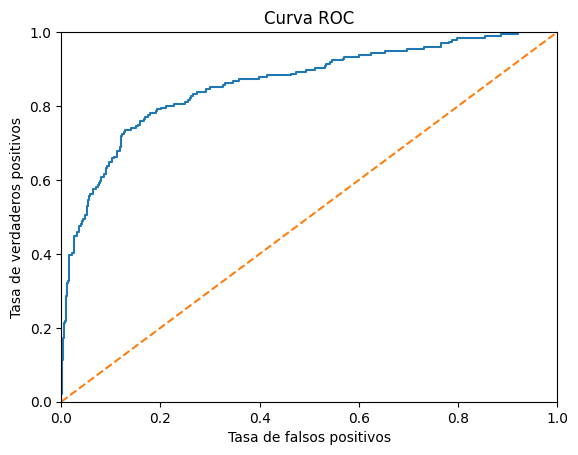

In [47]:
# Veamos que tan bueno es el modelo 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
# trazamos la grafica
plt.plot(fpr, tpr)
# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [48]:
print('El valor de AUC-ROC del modelo es: ', roc_auc_score(target_valid,probabilities_one_valid))

El valor de AUC-ROC del modelo es:  0.8602459640572646


Podemos evidenciar una mejora notoria en el modelo utiliza bosque de regresion aleatoria a cambio de un costo computacional más alto, ya que suele demorarse. Comenzamos por buscar los mejores hiperparametros para nuestro modelo inclueyendo el desbalance de clase como hiperparametro. Obtuvimos como resultado un modelo con f1-score de 0.63 para el conjunto de validacion pasando asi el propuesto para este proyecto. En la siguiente seccion realizaremos la prueba final con el cojunto test. 

Realizamos la prueba final: 

In [49]:
# Entrenamiento del modelo con los mejores hiperparametros 
model = RandomForestClassifier(n_estimators = 90, max_depth = 10, random_state = 54321,class_weight='balanced')
model.fit(features_train,target_train)
prediction = model.predict(features_test)

# Probabilidades 
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

# Metricas 
print("***Metricas***")
print('Exactitud: ',accuracy_score(target_test,prediction))
print('Recall: ',recall_score(target_test,prediction))
print('Precision: ',precision_score(target_test,prediction))
print('F1-Score: ',f1_score(target_test,prediction))
print('AUC-ROC: ',roc_auc_score(target_test,probabilities_one_valid))

***Metricas***
Exactitud:  0.861
Recall:  0.654639175257732
Precision:  0.6381909547738693
F1-Score:  0.6463104325699744
AUC-ROC:  0.8818589956767543


Como vemos F1-score pasa el limite impuesto para este proyecto, junto con otra metricas que nos pueden ayudar dependiendo de los objetivos que tengamos. 

#### Aplicando submuestreo 

In [50]:
# vamos equiparar las dos clases ya que la clase menos frecuente representa el 20% sobre el conjunto de entrenamiento
features_dowsampled ,target_dowsampled = submuestreo(features_train,target_train, 0.25)

In [51]:
best_f1_score = 0
best_depth = 0
best_est = 0

for est in range(10,101,10):
    for depth in range (1,15): 
        # selecionamos los hiperparametros 
        model = RandomForestClassifier(n_estimators=est, max_depth = depth, random_state = 54321)
        model.fit(features_dowsampled,target_dowsampled)
        
        # Realizamos las predicciones sobre el cojunto de validacion 
        prediction = model.predict(features_valid)
        
        # Calculamos el f1-score
        f1 = f1_score(target_valid,prediction)
        
        # Tomamos los mejores hiperparametros 
        if (f1 > best_f1_score ): 
            best_f1_score = f1
            best_depth = depth 
            best_est = est 
print(f"El mejor bosque tiene un {best_est} estimadores y una profundidad de {best_depth}, donde el valor del F1-score del modelo es {best_f1_score}")

El mejor bosque tiene un 90 estimadores y una profundidad de 8, donde el valor del F1-score del modelo es 0.6147540983606556


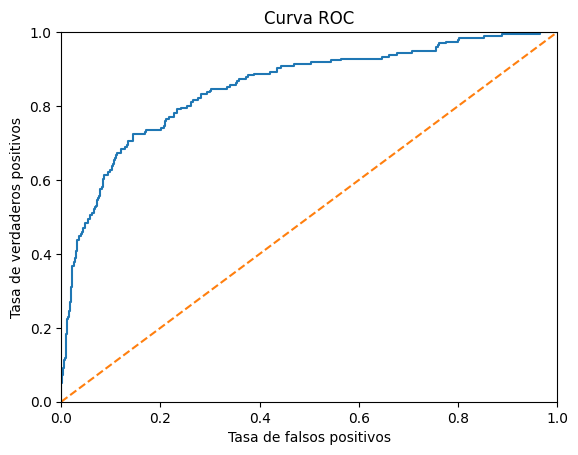

In [52]:
# Veamos que tan bueno es el modelo 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
# trazamos la grafica
plt.plot(fpr, tpr)
# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

In [53]:
print('El valor de AUC-ROC del modelo es: ', roc_auc_score(target_valid,probabilities_one_valid))

El valor de AUC-ROC del modelo es:  0.8506637729718752


Nos llevamos una grata sorpresa, aplicando submuestreo nuestro modelo mejora y por mucho en comparacion de la regresion logistica equiparando casi al anterior modelo mostrado, con un F1-score de 0.61 superando el limite del proyecto. Continuaremos con la prueba final en donde ultizaremos el conjunto test 

Realizamos la prueba final: 

In [54]:
# Instanciamos el modelo con los mejores hiperparametros 
model = RandomForestClassifier(n_estimators = 90, max_depth = 8, random_state = 54321)
# Entrenamos el modelo con los datos de entrenamiento despues de aplicar el submuestreo
model.fit(features_dowsampled,target_dowsampled)
prediction = model.predict(features_test)

# Probabilidades 
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

# Metricas 
print("***Metricas***")
print('Exactitud: ',accuracy_score(target_test,prediction))
print('Recall: ',recall_score(target_test,prediction))
print('Precision: ',precision_score(target_test,prediction))
print('F1-Score: ',f1_score(target_test,prediction))
print('AUC-ROC: ',roc_auc_score(target_test,probabilities_one_valid))

***Metricas***
Exactitud:  0.793
Recall:  0.788659793814433
Precision:  0.47962382445141066
F1-Score:  0.5964912280701754
AUC-ROC:  0.8818398096748612


Como observamos, nuestro modelo tiene un F1-score 0.59 en el conjunto de test al aplicar solo submuestreo. Esto evidencia que es sumamente importante tener en cuenta el desbalance de clases para mejorar nuestros modelos de predicción.

# Conclusiones del proyecto 

- Desbalance de Clases: A lo largo del proyecto, se evidenció un severo desbalance de clases, lo que impactó negativamente en el rendimiento de los modelos. La regresión logística, al tener un umbral predeterminado de 0.5, no logró clasificar adecuadamente la clase positiva, resultando en un F1-score de 0. Esto demuestra que es crucial considerar el equilibrio de clases desde el inicio para evitar que los modelos se inclinen hacia la clase mayoritaria.

- Limitaciones de la Regresión Logística: Aunque se intentaron varios enfoques para abordar el desbalance, la regresión logística mostró limitaciones inherentes al manejar conjuntos de datos desbalanceados. A pesar de experimentar con la modificación del umbral y el ajuste del parámetro class_weight='balanced', el modelo no logró alcanzar el objetivo de F1-score propuesto para el proyecto.

Estrategias de Manejo del Desbalance:

  - Modificación del Umbral: Al reducir el umbral, se logró un F1-score mejorado de 0.38, aunque aún por debajo de lo esperado. Esto sugiere que ajustes menores en el umbral pueden ser útiles, pero no suficientes para abordar desbalances severos.
  - Uso de class_weight: Implementar el parámetro class_weight='balanced' mejoró el AUC-ROC a 0.75, lo que indica una capacidad razonable para distinguir entre las clases, pero el F1-score siguió siendo insuficiente (0.51).
  - Sobremuestreo y Submuestreo: La aplicación de sobremuestreo resultó en un sobreajuste, mientras que el submuestreo mostró mejoras notables, lo que sugiere que este último es un enfoque más viable en este contexto. Sin embargo, ambos métodos aún tuvieron dificultades para cumplir con los objetivos de F1-score del proyecto.

- Mejoras con el Bosque Aleatorio: Al aplicar un modelo de bosque aleatorio, se observó una mejora significativa en el rendimiento. Este modelo logró un F1-score de 0.63 en el conjunto de validación, superando el objetivo.

- Resultados en el Conjunto de Test: Aunque se alcanzó un F1-score de 0.59 en el conjunto de test aplicando solo submuestreo, esto reafirma la necesidad de seguir explorando y refinando las técnicas para abordar el desbalance de clases en el futuro.

- Importancia del Desbalance de Clases: Este proyecto ha resaltado la importancia de abordar el desbalance de clases en problemas de clasificación. Los modelos simples, como la regresión logística, pueden ser inadecuados en estos contextos, y es esencial considerar métodos más avanzados que puedan adaptarse mejor a las características de los datos.